# Analiza skupień (ang. clustering)

1. 

In [1]:
from matplotlib import pyplot as plt

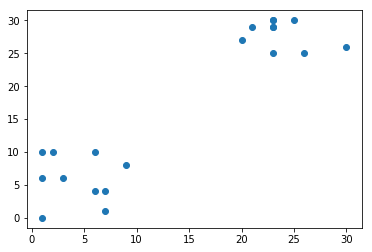

In [2]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

plt.scatter(x, y)

plt.show()

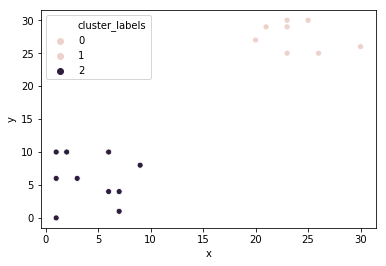

In [3]:
from scipy.cluster.hierarchy import linkage, fcluster

import pandas as pd

temp = {"x": x, "y": y}

df = pd.DataFrame(temp)

Z = linkage(df, "ward")

df["cluster_labels"] = fcluster(Z, 2, criterion="maxclust")

import seaborn as sns

sns.scatterplot(x="x", y="y", data=df, hue="cluster_labels")
plt.show()

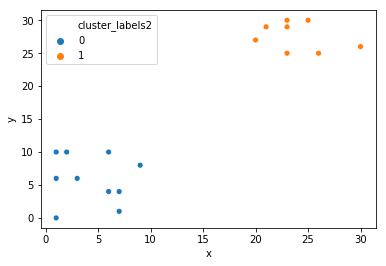

In [4]:
from scipy.cluster.vq import kmeans, vq

df_f = df[["x", "y"]].values.astype('float')
# df.drop("cluster_labels", axis=1, inplace=True)


centroids, _ = kmeans(df_f, 2)

df["cluster_labels2"], _ = vq(df_f, centroids)




sns.scatterplot(x="x", y="y", hue="cluster_labels2", data=df)





In [5]:
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

scaled_data = whiten(goals_for)

scaled_data

array([ 3.07692308,  2.30769231,  1.53846154,  2.30769231,  0.76923077,
        0.76923077,  1.53846154,  0.        ,  0.76923077,  3.07692308])

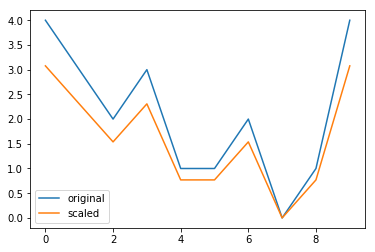

In [6]:
plt.plot(goals_for, label="original")

plt.plot(scaled_data, label="scaled")

plt.legend()

plt.show()

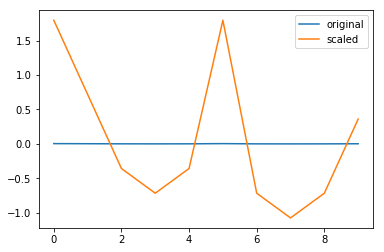

In [7]:
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

scaled_data = whiten(rate_cuts)

plt.plot(rate_cuts, label="original")
plt.plot(scaled_data, label="scaled")

plt.legend()

In [8]:
data = pd.read_csv("fifa_18_sample_data.csv")

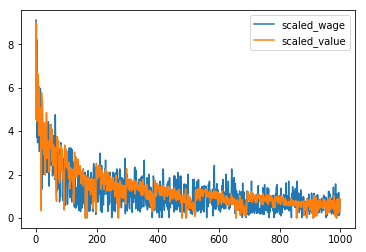

In [9]:
scaled_wage = whiten(data["eur_wage"])
scaled_value = whiten(data["eur_value"])

plt.plot(scaled_wage, label="scaled_wage")
plt.plot(scaled_value, label="scaled_value")
plt.legend()

In [10]:
x = """
0     17
1     20
2     35
3     14
4     37
5     33
6     14
7     30
8     35
9     17
10    11
11    21
12    13
13    10
14    81
15    84
16    87
17    83
18    90
19    97
20    94
21    88
22    89
23    93
24    92
25    82
26    81
27    92
28    91
29    22
30    23
31    25
32    25
33    27
34    17
35    17
"""


y = """
0       4
1       6
2       0
3       0
4       4
5       3
6       1
7       6
8       5
9       4
10      6
11     10
12      8
13     10
14     97
15     94
16     99
17     95
18     95
19     97
20     99
21     99
22     94
23     99
24     90
25     98
26    100
27     93
28     98
29     15
30     10
31      0
32     10
33      7
34     17
35     15
"""

In [11]:
from io import StringIO

df_coordinates_x = pd.read_csv(StringIO(x), sep="\s+", engine="python", header=None, index_col=0, names=["x_coordinate"])
df_coordinates_y = pd.read_csv(StringIO(y), sep="\s+", engine="python", header=None, index_col=0, names=["y_coordinate"])

comic_con = df_coordinates_x.join(df_coordinates_y)
comic_con

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4
5,33,3
6,14,1
7,30,6
8,35,5
9,17,4


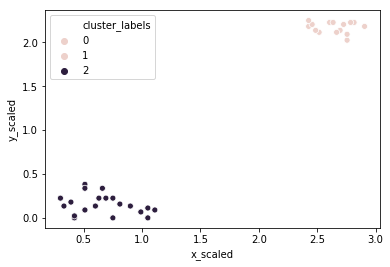

In [12]:
comic_con["x_scaled"] = whiten(comic_con["x_coordinate"])
comic_con["y_scaled"] = whiten(comic_con["y_coordinate"])

distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = comic_con)

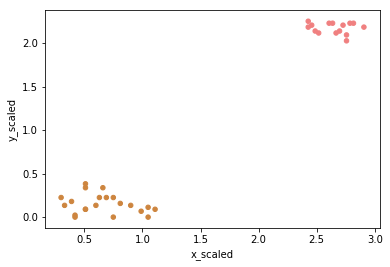

In [13]:
colors = {1: "lightcoral", 2: "peru"}

comic_con.plot.scatter(x = "x_scaled", y ="y_scaled", c=comic_con["cluster_labels"].apply(lambda x: colors[x]))

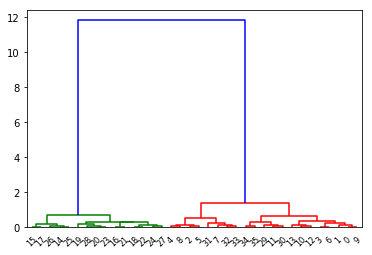

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [100.0, 100.0, 130.0, 130.0],
  [63.75, 63.75, 115.0, 115.0],
  [21.25, 21.25, 89.375, 89.375],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [170.0, 170.0, 203.75, 203.75],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342.5, 342.5],
  [292.5, 292.5, 331.25, 3

In [14]:
from scipy.cluster.hierarchy import dendrogram

dn = dendrogram(distance_matrix)

plt.show()
dn

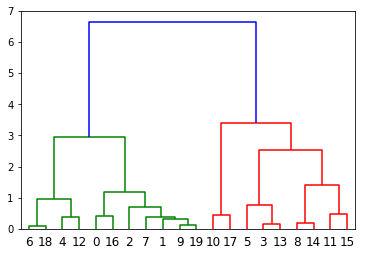

In [15]:
data["scaled_sliding_tackle"] = whiten(data["sliding_tackle"])
data["scaled_aggression"] = whiten(data["aggression"])
distance_matrix = linkage(data[['scaled_sliding_tackle', 'scaled_aggression']][:20], 'ward')

dn2 = dendrogram(distance_matrix)
plt.show()

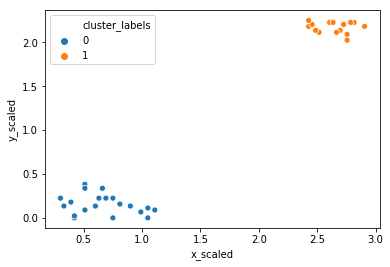

In [16]:
from numpy import random

random.seed(0)

cluster_centers, distorsion = kmeans(comic_con[["x_scaled", "y_scaled"]], 2)
# comic_con.drop("cluster_labels", inplace=True, axis=1)

comic_con["cluster_labels"], distorsion_list = vq(comic_con[["x_scaled", "y_scaled"]], cluster_centers)

sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()


In [17]:
mouse_data = [[
    240,
    287
  ],
  [
    258,
    261
  ],
  [
    262,
    254
  ],
  [
    275,
    235
  ],
  [
    280,
    228
  ],
  [
    284,
    221
  ],
  [
    335,
    172
  ],
  [
    371,
    152
  ],
  [
    472,
    105
  ],
  [
    501,
    105
  ],
  [
    522,
    111
  ],
  [
    547,
    123
  ],
  [
    549,
    125
  ],
  [
    592,
    143
  ],
  [
    612,
    149
  ],
  [
    640,
    157
  ],
  [
    677,
    163
  ],
  [
    697,
    163
  ],
  [
    720,
    163
  ],
  [
    734,
    163
  ],
  [
    755,
    154
  ],
  [
    775,
    140
  ],
  [
    792,
    135
  ],
  [
    809,
    121
  ],
  [
    823,
    109
  ],
  [
    837,
    96
  ],
  [
    862,
    81
  ],
  [
    871,
    74
  ],
  [
    895,
    67
  ],
  [
    916,
    73
  ],
  [
    937,
    84
  ],
  [
    964,
    104
  ],
  [
    997,
    127
  ],
  [
    1013,
    131
  ],
  [
    1055,
    134
  ],
  [
    1097,
    118
  ],
  [
    1115,
    109
  ],
  [
    1128,
    102
  ],
  [
    1161,
    80
  ],
  [
    1165,
    80
  ],
  [
    1166,
    80
  ],
  [
    1169,
    82
  ],
  [
    1173,
    92
  ],
  [
    1198,
    131
  ],
  [
    1203,
    144
  ],
  [
    1203,
    148
  ],
  [
    1203,
    154
  ],
  [
    1197,
    159
  ],
  [
    1186,
    165
  ],
  [
    1176,
    167
  ],
  [
    1172,
    169
  ],
  [
    1171,
    169
  ],
  [
    1158,
    169
  ],
  [
    1132,
    169
  ],
  [
    1089,
    169
  ],
  [
    1044,
    169
  ],
  [
    1007,
    169
  ],
  [
    987,
    169
  ],
  [
    971,
    169
  ],
  [
    957,
    169
  ],
  [
    946,
    169
  ],
  [
    941,
    169
  ],
  [
    927,
    173
  ],
  [
    916,
    173
  ],
  [
    901,
    173
  ],
  [
    884,
    166
  ],
  [
    862,
    162
  ],
  [
    841,
    154
  ],
  [
    821,
    146
  ],
  [
    801,
    138
  ],
  [
    773,
    126
  ],
  [
    761,
    126
  ],
  [
    755,
    124
  ],
  [
    744,
    122
  ],
  [
    737,
    122
  ],
  [
    732,
    122
  ],
  [
    726,
    122
  ],
  [
    713,
    132
  ],
  [
    695,
    145
  ],
  [
    672,
    160
  ],
  [
    652,
    174
  ],
  [
    640,
    182
  ],
  [
    630,
    189
  ],
  [
    617,
    192
  ],
  [
    608,
    192
  ],
  [
    573,
    189
  ],
  [
    547,
    174
  ],
  [
    517,
    163
  ],
  [
    472,
    151
  ],
  [
    427,
    141
  ],
  [
    387,
    133
  ],
  [
    337,
    131
  ],
  [
    312,
    131
  ],
  [
    296,
    138
  ],
  [
    276,
    150
  ],
  [
    244,
    172
  ],
  [
    232,
    178
  ],
  [
    188,
    202
  ],
  [
    152,
    185
  ],
  [
    108,
    143
  ],
  [
    93,
    92
  ],
  [
    93,
    90
  ],
  [
    97,
    100
  ],
  [
    128,
    131
  ],
  [
    184,
    166
  ],
  [
    254,
    174
  ],
  [
    374,
    155
  ],
  [
    458,
    121
  ],
  [
    520,
    99
  ],
  [
    583,
    84
  ],
  [
    777,
    91
  ],
  [
    866,
    117
  ],
  [
    936,
    130
  ],
  [
    943,
    132
  ],
  [
    1095,
    164
  ],
  [
    1160,
    166
  ],
  [
    1212,
    159
  ],
  [
    1238,
    149
  ],
  [
    1248,
    141
  ],
  [
    1260,
    131
  ],
  [
    1270,
    129
  ],
  [
    1270,
    132
  ],
  [
    1270,
    134
  ],
  [
    1262,
    138
  ],
  [
    1253,
    138
  ],
  [
    1244,
    141
  ],
  [
    1220,
    159
  ],
  [
    1205,
    167
  ],
  [
    1181,
    179
  ],
  [
    1095,
    209
  ],
  [
    1069,
    217
  ],
  [
    1048,
    225
  ],
  [
    1030,
    237
  ],
  [
    974,
    265
  ],
  [
    951,
    279
  ],
  [
    943,
    283
  ],
  [
    429,
    289
  ],
  [
    429,
    280
  ],
  [
    429,
    279
  ],
  [
    432,
    264
  ],
  [
    432,
    260
  ],
  [
    432,
    258
  ],
  [
    432,
    256
  ],
  [
    432,
    255
  ],
  [
    432,
    253
  ],
  [
    432,
    251
  ],
  [
    432,
    249
  ],
  [
    432,
    243
  ],
  [
    432,
    238
  ],
  [
    432,
    234
  ],
  [
    432,
    232
  ],
  [
    432,
    228
  ],
  [
    432,
    226
  ],
  [
    432,
    218
  ],
  [
    432,
    216
  ],
  [
    432,
    214
  ],
  [
    432,
    212
  ],
  [
    432,
    208
  ],
  [
    432,
    206
  ],
  [
    432,
    204
  ],
  [
    432,
    202
  ],
  [
    432,
    200
  ],
  [
    433,
    197
  ],
  [
    437,
    195
  ],
  [
    444,
    195
  ],
  [
    453,
    195
  ],
  [
    464,
    195
  ],
  [
    482,
    195
  ],
  [
    491,
    195
  ],
  [
    499,
    195
  ],
  [
    500,
    195
  ],
  [
    502,
    195
  ],
  [
    506,
    195
  ],
  [
    514,
    195
  ],
  [
    521,
    195
  ],
  [
    529,
    195
  ],
  [
    544,
    195
  ],
  [
    556,
    195
  ],
  [
    564,
    195
  ],
  [
    578,
    195
  ],
  [
    583,
    195
  ],
  [
    587,
    195
  ],
  [
    591,
    195
  ],
  [
    597,
    193
  ],
  [
    605,
    190
  ],
  [
    611,
    189
  ],
  [
    613,
    188
  ],
  [
    615,
    188
  ],
  [
    616,
    187
  ],
  [
    618,
    186
  ],
  [
    619,
    186
  ],
  [
    621,
    186
  ],
  [
    622,
    186
  ],
  [
    625,
    186
  ],
  [
    627,
    186
  ],
  [
    629,
    186
  ],
  [
    631,
    186
  ],
  [
    633,
    190
  ],
  [
    635,
    190
  ],
  [
    637,
    190
  ],
  [
    633,
    190
  ],
  [
    629,
    190
  ],
  [
    625,
    190
  ],
  [
    621,
    190
  ],
  [
    613,
    190
  ],
  [
    609,
    190
  ],
  [
    601,
    190
  ],
  [
    594,
    190
  ],
  [
    587,
    190
  ],
  [
    579,
    190
  ],
  [
    568,
    190
  ],
  [
    556,
    190
  ],
  [
    544,
    190
  ],
  [
    534,
    190
  ],
  [
    526,
    190
  ],
  [
    512,
    183
  ],
  [
    501,
    183
  ],
  [
    476,
    183
  ],
  [
    457,
    183
  ],
  [
    450,
    183
  ],
  [
    443,
    183
  ],
  [
    437,
    183
  ],
  [
    434,
    183
  ],
  [
    427,
    183
  ],
  [
    418,
    183
  ],
  [
    415,
    183
  ],
  [
    404,
    183
  ],
  [
    386,
    183
  ],
  [
    382,
    183
  ],
  [
    376,
    183
  ],
  [
    374,
    183
  ],
  [
    372,
    183
  ],
  [
    368,
    187
  ],
  [
    364,
    189
  ],
  [
    352,
    192
  ],
  [
    347,
    194
  ],
  [
    343,
    194
  ],
  [
    341,
    194
  ],
  [
    339,
    194
  ],
  [
    338,
    200
  ],
  [
    338,
    211
  ],
  [
    332,
    265
  ],
  [
    324,
    285
  ],
  [
    319,
    278
  ],
  [
    325,
    269
  ],
  [
    330,
    264
  ],
  [
    333,
    260
  ],
  [
    334,
    259
  ],
  [
    334,
    257
  ],
  [
    335,
    256
  ],
  [
    338,
    255
  ],
  [
    339,
    254
  ],
  [
    340,
    253
  ],
  [
    346,
    248
  ],
  [
    353,
    242
  ],
  [
    367,
    232
  ],
  [
    385,
    218
  ],
  [
    455,
    176
  ],
  [
    480,
    167
  ],
  [
    529,
    119
  ],
  [
    545,
    97
  ],
  [
    576,
    60
  ],
  [
    590,
    47
  ],
  [
    616,
    24
  ],
  [
    650,
    7
  ],
  [
    668,
    1
  ],
  [
    636,
    24
  ],
  [
    591,
    55
  ],
  [
    566,
    74
  ],
  [
    515,
    117
  ],
  [
    511,
    119
  ],
  [
    512,
    119
  ],
  [
    560,
    85
  ],
  [
    558,
    85
  ],
  [
    557,
    87
  ],
  [
    556,
    88
  ],
  [
    555,
    91
  ],
  [
    553,
    93
  ],
  [
    549,
    97
  ],
  [
    545,
    102
  ],
  [
    540,
    109
  ],
  [
    536,
    116
  ],
  [
    534,
    117
  ],
  [
    530,
    121
  ],
  [
    528,
    123
  ],
  [
    524,
    125
  ],
  [
    516,
    128
  ],
  [
    510,
    131
  ],
  [
    503,
    136
  ],
  [
    496,
    140
  ],
  [
    483,
    152
  ],
  [
    471,
    161
  ],
  [
    459,
    169
  ],
  [
    454,
    172
  ],
  [
    453,
    170
  ],
  [
    453,
    168
  ],
  [
    455,
    165
  ],
  [
    457,
    164
  ],
  [
    460,
    164
  ],
  [
    463,
    162
  ],
  [
    465,
    160
  ],
  [
    466,
    160
  ],
  [
    467,
    161
  ],
  [
    467,
    163
  ],
  [
    463,
    164
  ],
  [
    464,
    164
  ],
  [
    468,
    160
  ],
  [
    473,
    159
  ],
  [
    482,
    149
  ],
  [
    491,
    146
  ],
  [
    503,
    141
  ],
  [
    518,
    136
  ],
  [
    537,
    126
  ],
  [
    560,
    119
  ],
  [
    598,
    113
  ],
  [
    629,
    107
  ],
  [
    650,
    101
  ],
  [
    673,
    91
  ],
  [
    705,
    83
  ],
  [
    745,
    71
  ],
  [
    825,
    44
  ],
  [
    880,
    20
  ],
  [
    890,
    7
  ],
  [
    892,
    4
  ],
  [
    719,
    17
  ],
  [
    684,
    59
  ],
  [
    651,
    103
  ],
  [
    551,
    236
  ],
  [
    505,
    203
  ],
  [
    509,
    220
  ],
  [
    503,
    236
  ],
  [
    500,
    237
  ],
  [
    481,
    245
  ],
  [
    477,
    245
  ],
  [
    434,
    253
  ],
  [
    404,
    257
  ],
  [
    371,
    261
  ],
  [
    359,
    265
  ],
  [
    353,
    268
  ],
  [
    353,
    266
  ],
  [
    353,
    263
  ],
  [
    353,
    261
  ],
  [
    355,
    258
  ],
  [
    358,
    256
  ],
  [
    361,
    251
  ],
  [
    362,
    251
  ],
  [
    363,
    250
  ],
  [
    363,
    248
  ],
  [
    364,
    247
  ],
  [
    365,
    246
  ],
  [
    365,
    244
  ],
  [
    366,
    243
  ],
  [
    367,
    241
  ],
  [
    367,
    238
  ],
  [
    367,
    234
  ],
  [
    367,
    232
  ],
  [
    367,
    230
  ],
  [
    369,
    228
  ],
  [
    369,
    226
  ],
  [
    374,
    211
  ],
  [
    377,
    208
  ],
  [
    377,
    202
  ],
  [
    383,
    190
  ],
  [
    383,
    183
  ],
  [
    385,
    181
  ],
  [
    385,
    179
  ],
  [
    385,
    181
  ],
  [
    381,
    192
  ],
  [
    368,
    215
  ],
  [
    348,
    251
  ],
  [
    327,
    287
  ]
]

In [18]:
import numpy as np

np_mouse = np.array(mouse_data)
mouse = pd.DataFrame(np_mouse, columns=['x','y'])

mouse['x_scaled'] = whiten(mouse["x"])
mouse['y_scaled'] = whiten(mouse["y"])

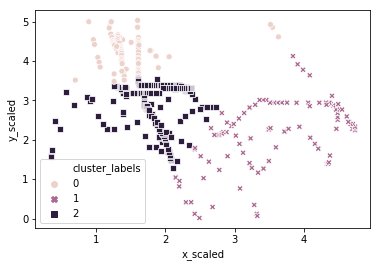

In [19]:
cluster_centers, distortion = kmeans(mouse[['x_scaled','y_scaled']], 3)

mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

sns.scatterplot(x="x_scaled", y="y_scaled", style="cluster_labels", hue='cluster_labels', data = mouse)

In [20]:
import matplotlib.image as img
poster = img.imread("banner-2383908_960_720.png")

In [21]:
r =[]
g =[]
b =[]

for row in poster:
    for temp_r, temp_g, temp_b, temp_a in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [22]:
d = sum(r), sum(g), sum(b)

In [23]:
d

(175366.76396917785, 11707.721759120002, 11707.721759120002)

In [ ]:
np_r = np.array(r)
np_g = np.array(g)
np_b = np.array(b)

df_poster = pd.DataFrame({"r":np_r, "g":np_g, "b":np_b})

df_poster["scaled_r"] = whiten(df_poster['r'])
df_poster["scaled_g"] = whiten(df_poster['g'])
df_poster["scaled_b"] = whiten(df_poster['b'])

distorsions = []
num_clusters = range(1,7)

for i in num_clusters:
    cluster_centers, distorsion = kmeans(df_poster[["scaled_r", "scaled_g", "scaled_b"]], i)
    distorsions.append(distorsions)
    
elbow_plot = pd.DataFrame({"num_clusters": num_clusters, "distorsions": distorsions})
sns.lineplot(x='num_clusters', y='distorsions', data=elbow_plot)

plt.xticks(num_clusters)

In [ ]:
r_std, g_std, b_std = df_poster[['r','g','b']].std()
color = []

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
        scaled_r * r_std /255,
        scaled_g * g_std /255,
        scaled_b * b_std /255
    ))